In [2]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 3s 168us/step - loss: 1.1069 - accuracy: 0.7262 - val_loss: 0.6342 - val_accuracy: 0.8425
Epoch 2/5
18000/18000 [==============================] - 3s 154us/step - loss: 0.5083 - accuracy: 0.8685 - val_loss: 0.4727 - val_accuracy: 0.8734
Epoch 3/5
18000/18000 [==============================] - 3s 152us/step - loss: 0.4111 - accuracy: 0.8883 - val_loss: 0.4099 - val_accuracy: 0.8872
Epoch 4/5
18000/18000 [==============================] - 3s 149us/step - loss: 0.3667 - accuracy: 0.8980 - val_loss: 0.3769 - val_accuracy: 0.8938
Epoch 5/5
10000/10000 [==============================] - 0s 36us/step

loss_and_metrics : [0.33598531098365786, 0.9071000218391418]


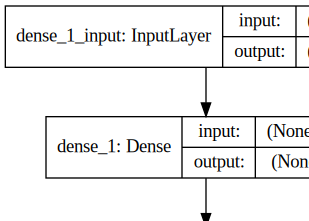

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/seungho/anaconda3/envs/vdsr

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h21bd128_2         6.5 MB
    libtiff-4.1.0              |       h2733197_0         447 KB
    pydot-1.4.1                |           py37_0          43 KB
    ------------------------------------------------------------
                                           Total:         7.0 MB

The following NEW packages will be INSTALLED:

  cairo              pkgs/main/linux-64::cairo-1.14.12-h8948797_3
  fribidi            pkgs/main/linux-64::fribidi-1.0.5-h7b6447c_0
  graphite2          pkg